# 第七章 文件及异常处理
## 7.1 学生成绩处理与批量修改

- 将文本文件批量转换成Excel文件
    - 文本文件读写
    - Excel文件读写
    - 操作系统命令

## 7.2 预备知识--文件操作与openpyxl库
### 7.2.1 文件

- 文件可分为文本文件和二进制文件两大类
- 文本文件：由若干行以特定编码存储的字符组成，常见编码形式有ASCII编码，UNICODE编码等等。通常每行以换行符“\n”结尾。在Windows系统中，扩展名为txt、log、ini、py的文件都属于文本文件。可用记事本之类的文本编辑器进行编辑。
- 二进制文件：除文本文件以外的文件都可以称为二进制文件，其信息以字节串形式存储，不能用记事本或普通文字处理软件编辑，打开会是乱码，需使用相关软件进行解码后读取。常见的如各类office文档、音视频文件、可执行文件、图形图像文件等。


### 7.2.2 文件常用操作
#### 文件的打开

In [2]:
f = open("data/sample.txt","r")
txt = f.read()
print(txt)
f.close()

中国:北京 
蒙古:乌兰巴托 
朝鲜:平壤 
韩国:首尔 
日本:东京 


#### 文件的关闭

In [3]:
f.close()

#### 文件的读写

In [5]:
f = open("data/sample.txt","r")
txt = f.read(3)
print(txt)
txt1 = f.read()
print(txt1)
f.close()

中国:
北京 
蒙古:乌兰巴托 
朝鲜:平壤 
韩国:首尔 
日本:东京 


In [8]:
f = open("data/sample.txt","r")
line = f.readline(3)
print(line)
print(f.readline())
f.close()

中国:
北京 



In [9]:
f = open("data/sample.txt","r")
lines = f.readlines()
print(lines)
f.close()

['中国:北京 \n', '蒙古:乌兰巴托 \n', '朝鲜:平壤 \n', '韩国:首尔 \n', '日本:东京 ']


In [11]:
f = open("data/sample.txt","r")
#for line in f.readlines():
for line in f:
    print(line)
f.close()

中国:北京 

蒙古:乌兰巴托 

朝鲜:平壤 

韩国:首尔 

日本:东京 


#### with语句

In [2]:
with open("data/sample.txt","r") as f:
    for line in f:
        print(line)
print("End")

中国:北京 

蒙古:乌兰巴托 

朝鲜:平壤 

韩国:首尔 

日本:东京 
End


In [7]:
f = open("data/sample1.txt","a+")
s = "美国:华盛顿\n"
f.write(s)
lst = ['中国:北京 \n', '蒙古:乌兰巴托 \n', '朝鲜:平壤 \n', '韩国:首尔 \n', '日本:东京 ']
f.writelines(lst)
f.close()

### 7.2.3 openpyxl库常用方法
#### 创建Excel文件

In [9]:
from openpyxl import Workbook
wb = Workbook()
ws = wb.worksheets[0]
ws["A1"] = "张三"
ws["A2"] = "李四"
ws["B1"] = 100
wb.save("data/foo.xlsx")

#### append函数

In [10]:
from openpyxl import load_workbook
wb = load_workbook("data/foo.xlsx")
ws = wb.worksheets[0]
ws.append([1,2,3,4,5])
wb.save("data/foo.xlsx")

#### 保存文件

In [ ]:
wb.save("data/foo.xlsx")

#### 读写Excel文件

#### 获取单元格内容

In [21]:
from openpyxl import load_workbook
wb = load_workbook("data/test.xlsx")
ws = wb.worksheets[0]
print(ws["A1"].value)
for cell in ws["C3":"F3"][0]:
    print(cell.value, end=" ")

学生成绩表
92 85 84 91 

#### 单元格赋值

In [ ]:
ws["A1"] = "张三"
ws["A2"] = "李四"
ws["B1"] = 100

#### 获取行和列

In [24]:
from openpyxl import load_workbook
wb = load_workbook("data/test.xlsx")
ws = wb.worksheets[0]
print(ws.cell(2,2).value)
print(ws.max_row)
print(ws.max_column)

姓名
41
6


#### 获取所有单元格

In [25]:
from openpyxl import load_workbook
wb = load_workbook("data/test.xlsx")
ws = wb.worksheets[0]
for r in range(ws.max_row):
    for c in range(ws.max_column):
        print(ws.cell(r+1,c+1).value)

学生成绩表
None
None
None
None
None
学号
姓名
课堂表现
课后实训
大作业
期末成绩
01301001
朱智豪
92
85
84
91
01301002
许可
87
81
82
89
01301003
张炜发
82
83
79
80
01301004
萧嘉慧
83
90
71
64
01301005
林崇嘉
91
97
76
68
01301006
郑振灿
96
85
71
61
01301007
杜秋楠
90
87
79
82
01301008
杨德生
77
86
64
45
01301009
韩振峰
86
84
76
75
01301010
罗曼琳
92
98
93
92
01301011
潘保文
90
92
80
77
01301012
曾繁智
89
90
78
76
01301013
江希超
90
85
89
87
01301014
谢宝宜
95
90
95
97
01301015
张颖
98
98
93
87
01301016
欧源
90
100
96
94
01301017
杨淼坤
88
86
78
67
01301018
蔡朝丹
86
96
85
77
01301019
曾胜强
85
93
77
63
01301020
许桂忠
84
88
82
74
01301021
郑夏琪
91
85
75
50
01301022
郑铭伟
88
75
75
73
01301023
钟霸星
93
87
78
64
01301024
欧雅丽
93
87
70
60
01301025
陈钊锋
86
78
79
71
01301026
洪金奎
94
88
80
67
01301027
陈志鹏
91
88
97
99
01301028
杜嘉颖
92
80
86
84
01301029
谢俊辉
94
83
80
68
01301030
杨定康
90
78
85
79
01301031
江梓健
88
89
85
78
01301032
侯必莲
90
86
81
69
01301033
李炫廷
95
87
87
82
01301034
赖永伟
95
84
76
60
01301035
李勇
88
85
70
55
01301036
詹婷珊
92
82
89
88
1
2
3
4
5
None
1
2
3
4
5
None
1
2
3
4
5
None


### 7.2.4 os库常用方法

In [28]:
import os
file_lst = os.listdir("d:/python")
for f in file_lst:
    print(f)

.ipynb_checkpoints
19大数据1
19大数据3
19大数据4
dxf
Untitled.ipynb
字典与集合.txt


## 7.3 任务分析
### 7.3.1任务分析--单个文件格式转换

### 7.3.2 任务分析--批量文件格式转换

### 7.3.3 任务分析--单个文件内容修改

### 7.3.4 任务分析--批量文件内容修改

## 7.4 任务实现
#### 单个文件格式转换

In [3]:
from openpyxl import Workbook
import os
def txt_to_xlsx(filename):
    xlsx_name = filename[:-3] + "xlsx"
    wb = Workbook()
    ws = wb.worksheets[0]
    with open(filename, "r", encoding="utf8") as fp:
        for line in fp:
            lst = line.strip().split(",")
            ws.append(lst)
        wb.save(xlsx_name)
        
#txt_to_xlsx("data/txt/test10.txt")

#### 批量文件格式转换

In [4]:
path = "data/txt/"
file_lst = os.listdir(path)
for file_name in file_lst:
    pos = file_name.rindex(".")
    if file_name[pos+1:]=="txt":
        txt_to_xlsx(path + file_name)
print("转换完毕")

转换完毕


#### 单个文件内容修改

#### 批量文件内容修改

## 7.5 学生成绩文件异常处理

- 文件找不到
- 工作表下表越界
- 数据类型不匹配


## 7.6 预备知识--异常
### 7.6.1 异常

- 异常和错误

In [5]:
a = input()
b = input()
c = a + b
print(c)


10
20
1020


In [6]:
a = inputr()

NameError: name 'inputr' is not defined

#### 除零异常

In [9]:
a = int(input())
b = int(input())
c = a / b
print(c)

10
0


ZeroDivisionError: division by zero

#### 操作数类型异常

In [11]:
a = int(input())


abc


ValueError: invalid literal for int() with base 10: 'abc'

In [12]:
print("1" + 2)

TypeError: can only concatenate str (not "int") to str

#### 命名异常

In [13]:
y = x + 5
print(x)

NameError: name 'x' is not defined

#### 文件不存在异常

In [14]:
f = open("data/abc.txt", "r")

FileNotFoundError: [Errno 2] No such file or directory: 'data/abc.txt'

#### 下标越界异常

In [15]:
lst = [1,2,3,4]
print(lst[4])

IndexError: list index out of range

#### 参数类型异常

In [18]:
#x = [5]
x = 5
len(x)

TypeError: object of type 'int' has no len()

### 7.6.2 常见异常结构处理
#### try...except...

In [31]:
try:
    # 可能发生异常的代码
    a = int(input())
    b = int(input())
    p = a / b
except ZeroDivisionError:
    # 发生异常后的处理
    p = 0
except ValueError:
    b = 1

print(p)

10
abc


NameError: name 'p' is not defined

In [37]:
try:
    a = 10
    b = 2
    z = a / b
    c = int("abc")
    print(y)
    print("12" + 12)
except ZeroDivisionError:
    print("被零除")
except ValueError:
    print("数据类型错误")
except NameError:
    print("命名错误")


数据类型错误


#### try...except...else...

In [42]:
try:
    a = 10
    b = 2
    z = a / b
    #c = int("abc")
    #print(y)
    print("12" + 12)
except ZeroDivisionError:
    print("被零除")
except ValueError:
    print("数据类型错误")
except NameError:
    print("命名错误")
except:
    print("其他错误")
else:
    print("没有错误")

其他错误


#### try...except...finally...

In [44]:
try:
    a = 10
    b = 2
    z = a / b
    #c = int("abc")
    #print(y)
    #print("12" + 12)
except ZeroDivisionError:
    print("被零除")
except ValueError:
    print("数据类型错误")
except NameError:
    print("命名错误")
except:
    print("其他错误")
else:
    print("没有错误")
finally:
    print("程序结束")

没有错误
程序结束


#### 捕捉多种异常的处理结构

## 7.7 任务分析

## 7.8 任务实现

In [49]:
from openpyxl import load_workbook
try:
    wb = load_workbook("data/foo.xlsx")
    ws = wb.worksheets[2]
    ws.append([6,7,8,9,10])
    wb.save("data/foo.xlsx")
except FileNotFoundError:
    print("文件不存在")
except IndexError:
    print("工作表下标越界")
except TypeError:
    print("参数类型错误")
except PermissionError:
    print("文件没有权限")
except:
    print("未知错误")
else:
    print("文件正常打开并添加了数据")
finally:
    print("程序结束")

文件正常打开并添加了数据
程序结束


## 7.9 职业院校建设方案的分词和云图

- 文本处理
- 自然语言处理
- 可视化

## 7.10 预备知识--jieba库和wordcloud库
### 7.10.1 jieba库

In [1]:
# pip install jieba
import jieba

#### 精确模式

In [2]:
range(10)

range(0, 10)

In [5]:
# jieba.cut(),jieba.lcut()
s = "深圳职业技术学院中国特色世界一流职业院校建设方案"
lst = jieba.lcut(s, cut_all=False)
print(lst)

['深圳', '职业', '技术', '学院', '中国', '特色', '世界', '一流', '职业院校', '建设', '方案']


#### 全模式

In [6]:
s = "深圳职业技术学院中国特色世界一流职业院校建设方案"
lst = jieba.lcut(s, cut_all=True)
print(lst)

['深圳', '职业', '技术', '术学', '学院', '院中', '中国', '国特', '特色', '世界', '一流', '职业', '职业院校', '院校', '建设', '方案']


#### 搜索引擎模式

In [7]:
s = "深圳职业技术学院中国特色世界一流职业院校建设方案"
lst = jieba.lcut_for_search(s)
print(lst)

['深圳', '职业', '技术', '学院', '中国', '特色', '世界', '一流', '职业', '院校', '职业院校', '建设', '方案']


### 7.10.2 wordcloud库

In [8]:
# pip install wordcloud
import wordcloud

#### 创建词云图

In [9]:
import wordcloud
wc = wordcloud.WordCloud()
wc.generate("python is good linux is good python is better python is best")
wc.to_file("data/sample.png")

In [10]:
with open("data/hamlet.txt","r") as f:
    txt = f.read()
wc = wordcloud.WordCloud()
wc.generate(txt)
wc.to_file("data/hamlet.png")

## 7.11 任务分析
### 7.11.1 词频统计

### 7.11.2 统计优化

### 7.11.3 词云图的绘制

## 7.12 任务实现
#### 词频统计

In [12]:
import jieba
with open("data/szpt.txt","r") as f:
    txt = f.read()
seg_list = jieba.lcut(txt)
counts = {}
for word in seg_list:
    counts[word] = counts.get(word,0) + 1
count_list = list(counts.items())
count_list.sort(key=lambda x:x[1], reverse=True)
print(count_list[:10])

[('，', 717), ('\n', 702), ('、', 479), (' ', 437), ('。', 317), ('的', 299), ('\u3000', 246), ('建设', 164), ('和', 159), ('教育', 158)]


#### 统计优化

In [13]:
import jieba
with open("data/szpt.txt","r") as f:
    txt = f.read()
seg_list = jieba.lcut(txt)
counts = {}
for word in seg_list:
    counts[word] = counts.get(word,0) + 1
    
# 停止词处理
excludes={'\u3000','\n',' ','的','，','：','（','）','、',' ','。','和','“','”','与','等','《','》'}
for w in excludes:
    if w in counts:
        del counts[w]
    
count_list = list(counts.items())
count_list.sort(key=lambda x:x[1], reverse=True)
print(count_list[:10])

[('建设', 164), ('教育', 158), ('技术', 120), ('职业', 114), ('一流', 107), ('专业', 73), ('世界', 72), ('国际', 71), ('技能', 69), ('创新', 68)]


In [19]:
import jieba
import wordcloud
with open("data/szpt.txt","r") as f:
    txt = f.read()
seg_list = jieba.lcut(txt)
counts = {}
for word in seg_list:
    counts[word] = counts.get(word,0) + 1
    
# 停止词处理
excludes=['\u3000','\n',' ','的','，','：','（','）','、',
          ' ','。','和','“','”','与','等','《','》']
for w in excludes:
    if w in counts:
        del counts[w]
    
count_list = list(counts.items())
count_list.sort(key=lambda x:x[1], reverse=True)
print(count_list[:10])

# 词云
wc_split = "/".join(seg_list)
wc = wordcloud.WordCloud(background_color="white",font_path="c:/windows/Fonts/STXIHEI.TTF")
wc.generate(wc_split)
wc.to_file("data/szpt.png")

[('建设', 164), ('教育', 158), ('技术', 120), ('职业', 114), ('一流', 107), ('专业', 73), ('世界', 72), ('国际', 71), ('技能', 69), ('创新', 68)]


#### 词云图绘制

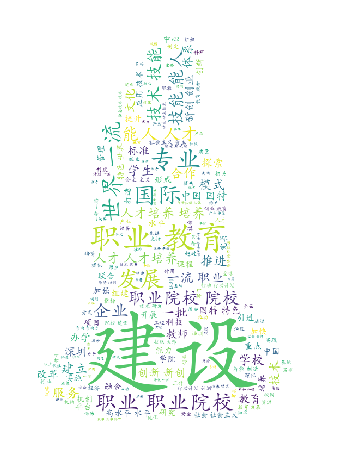

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import jieba
import numpy
#打开图像并转化为数字矩阵
img= numpy.array(Image.open("data/back.png"))

text_word = open('data/szpt.txt').read()

wordlist= jieba.lcut(text_word, cut_all=True)
wl_split = "/".join(wordlist)

wc1 = WordCloud(background_color='WHITE', max_font_size=1000, mask=img,
                font_path="C:\\Windows\\Fonts\\STKAITI.TTF")

my_wordcloud = wc1.generate(wl_split)

#image_color = ImageColorGenerator(img)
#wc1.recolor(color_func=image_color)
plt.figure(figsize=(12,8))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

## 7.13 总结与提高--os库其他成员、文件编码、再谈异常
## 7.13.1 os库其他成员

### 7.13.2 文件编码

### 7.13.3 再谈异常

## 7.14 巩固与提高
### 7.14.1 数据处理与文件另存

### 7.14.2 批量修改记事本文件编码格式

### 7.14.3 演员参演信息

In [1]:
import openpyxl
from openpyxl import Workbook

def getData(filename):
    actors = dict()
    # 打开xlsx文件，并获取第一个worksheet
    wb = openpyxl.load_workbook(filename)
    ws = wb.worksheets[0]
    # 遍历Excel文件中的所有行
    for index, row in enumerate(ws.rows):
        # 绕过第一行的表头
        if index == 0:
            continue
        # 获取电影名称和演员列表
        filmName, actor = row[0].value, row[2].value.split('，')
        # 遍历该电影的所有演员，统计参演电影
        for a in actor:
            actors[a] = actors.get(a, set())
            actors[a].add(filmName)
    return actors

data = getData('data/电影导演演员.xlsx')
# 排序
data = sorted(data.items(), key=lambda x:int(x[0][2:]))
for item in data:
    print(item)

('演员1', {'电影10', '电影1', '电影15', '电影7', '电影13', '电影5', '电影11', '电影8', '电影3', '电影4'})
('演员2', {'电影2', '电影1', '电影5'})
('演员3', {'电影1', '电影17', '电影6', '电影2', '电影18', '电影13', '电影5', '电影11', '电影8', '电影3', '电影4', '电影9'})
('演员4', {'电影14', '电影10', '电影1', '电影17', '电影12', '电影16', '电影7', '电影2', '电影18', '电影11', '电影8', '电影4', '电影9'})
('演员5', {'电影10', '电影6', '电影2', '电影3', '电影9'})
('演员6', {'电影3', '电影7'})
('演员7', {'电影12', '电影6', '电影7', '电影13', '电影4'})
('演员8', {'电影15', '电影5', '电影8'})
('演员9', {'电影14', '电影17', '电影12', '电影6', '电影9'})
('演员10', {'电影14', '电影10', '电影18'})
('演员11', {'电影15', '电影11'})
('演员12', {'电影12'})
('演员13', {'电影13', '电影16'})
('演员14', {'电影14', '电影16'})
('演员15', {'电影15'})
('演员16', {'电影16'})


## 7.15 编程习题

## 补充：Python图像处理--pillow库

In [17]:
# pip install pillow
from PIL import Image, ImageFilter
im = Image.open("data/Koala.jpg")
# im.show()
#im.save("data/back.bmp")
om = im.filter(ImageFilter.CONTOUR)
om.show()